In [1]:
# Explaining: This virus becomes endemic through frequent person-to-person contact and has
# been proven to disproportionately target the BAME community.
# Seeing the spread of this virus from the original outbreak offers the potential to assess
# when to close borders, but also to plan for future outbreak mitigation without unnecessarily
# adverse economic implications. Tell the story of COVID-19from the view of developing countries.
# Produce a 5-minute video explaining the outbreak using at most 3 different visualisations.

In [2]:
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

geolocator = Nominatim(user_agent="Your_Name")

india_fp = "datasets/Indian_States.shp"
pak_fp = "datasets/PAK_adm1.shx"
italy_fp = "datasets/ITA_adm1.shp"

india_map_df = gpd.read_file(india_fp)
pak_map_df = gpd.read_file(pak_fp)
italy_map_df = gpd.read_file(italy_fp)

green_patch = mpatches.Patch(color='yellowgreen', label='Cured')
red_patch = mpatches.Patch(color='lightcoral', label='Deaths')
gray_patch = mpatches.Patch(color='slategray', label='Confirmed')

In [3]:
df = pd.read_csv('datasets/dpc-covid19-ita-regioni.csv')
df = df[['data', 'lat', 'long', 'nuovi_positivi', 'deceduti', 'dimessi_guariti']]
df = df.rename(columns={"data": "Date", "lat": "lat", "long": "lon",
                        "nuovi_positivi":"Confirmed",
                        "deceduti":"Deaths","dimessi_guariti":"Cured"})
df = df.sort_values(by = 'Date')
df = df.dropna()

E:\miniconda3\lib\site-packages\geopandas\plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
E:\miniconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


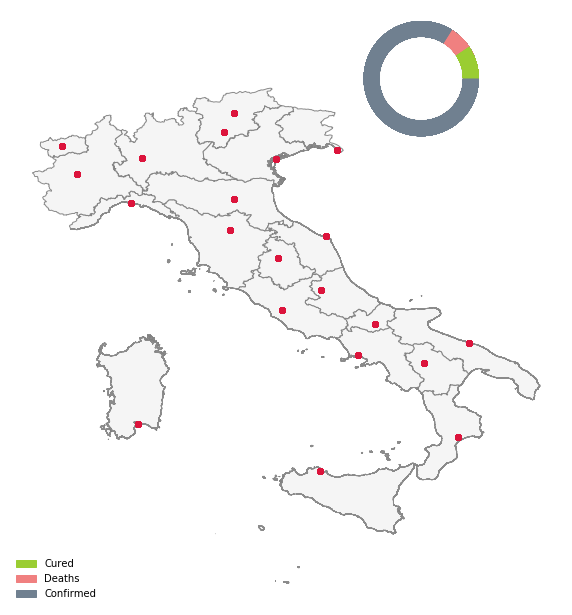

In [4]:
fig, ax = plt.subplots(1, figsize = (10, 12))
ax = italy_map_df.plot(color = 'whitesmoke', edgecolor = 'grey', alpha=0.9, markersize = 1, axes = ax)
for i in range(100):
    ax.scatter(df['lon'][:i], df['lat'][:i], color = 'crimson')
    ax.set_axis_off()

    left, bottom, width, height = [0.6, 0.7, 0.2, 0.2]
    ax2 = fig.add_axes([left, bottom, width, height])

    size = [df['Cured'][:i].sum(),df['Deaths'][:i].sum(),df['Confirmed'][:i].sum()]

    # Create a circle for the center of the plot
    my_circle=plt.Circle((0,0), 0.7, color='white')

    # Give color names
    ax2.pie(size, colors=['yellowgreen','lightcoral','slategray'])
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    ax.legend(handles=[green_patch, red_patch, gray_patch], loc='lower left', frameon=False)
    fig.savefig('images/italy/italy_spread{}.png'.format(i))
plt.show()

In [5]:
df = pd.read_csv('datasets/covid_19_india.csv')
df = df[['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed']]
df = df.dropna()
df = df[df['State/UnionTerritory'] != 'Dadra and Nagar Haveli and Daman and Diu']
df = df[df['State/UnionTerritory'] != 'Cases being reassigned to states']
df = df[df['State/UnionTerritory'] != 'Dadar Nagar Haveli']
df = df[df['State/UnionTerritory'] != 'Unassigned']

In [6]:
my_list = ['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
           'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
           'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
           'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
           'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
           'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
           'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
           'Tripura', 'Nagaland', 'Meghalaya',
           'Sikkim', 'Daman & Diu', 'Telangana', 'Telangana***']

my_lat_long_list = []
for value in my_list:
    try:
        location = geolocator.geocode(value)
        my_lat_long_list.append((location.latitude, location.longitude))
    except:
        print(value)

my_dict = dict(zip(my_list, my_lat_long_list))

In [7]:
my_list = []
for i, row in df.iterrows():
    my_list.append(my_dict[row['State/UnionTerritory']])
lat_lon_df = pd.DataFrame(my_list, columns=['lat', 'lon'])

np_array = np.concatenate((df.to_numpy(), lat_lon_df.to_numpy()),axis=1)
df = pd.DataFrame(np_array, columns = ['Date', 'Region','Cured', 'Deaths', 'Confirmed', 'lat', 'lon'])

In [8]:
df = df.sort_values(by = 'Date')

E:\miniconda3\lib\site-packages\geopandas\plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
E:\miniconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


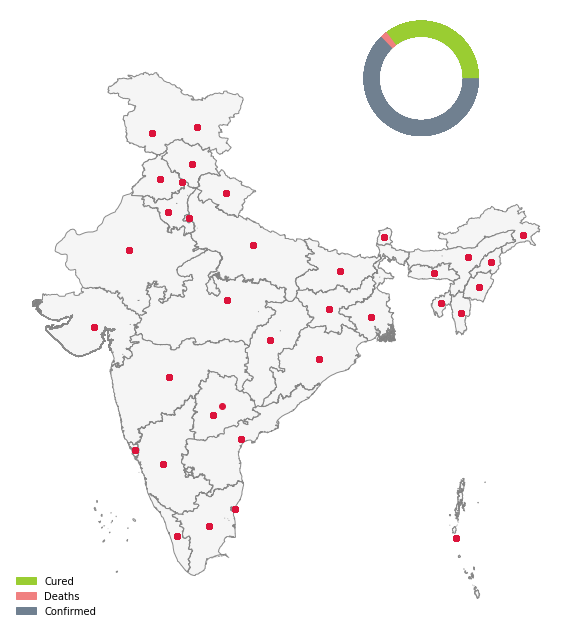

In [9]:
fig, ax = plt.subplots(1, figsize = (10, 12))
ax = india_map_df.plot(color = 'whitesmoke', edgecolor = 'grey', alpha=0.9, markersize = 1, axes = ax)
for i in range(130):
    ax.scatter(df['lon'][:i], df['lat'][:i], color = 'crimson')
    ax.set_axis_off()

    left, bottom, width, height = [0.6, 0.7, 0.2, 0.2]
    ax2 = fig.add_axes([left, bottom, width, height])

    size = [df['Cured'][:i].sum(),df['Deaths'][:i].sum(),df['Confirmed'][:i].sum()]

    # Create a circle for the center of the plot
    my_circle=plt.Circle((0,0), 0.7, color='white')

    # Give color names
    ax2.pie(size, colors=['yellowgreen','lightcoral','slategray'])
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    ax.legend(handles=[green_patch, red_patch, gray_patch], loc='lower left', frameon=False)
    fig.savefig('images/india/india_spread{}.png'.format(i))

plt.show()

In [10]:
df = pd.read_csv('datasets/PK COVID-19-3jun.csv')
df = df[['Date', 'Cases', 'Deaths', 'Recovered', 'City']]
df = df.dropna()
df = df[df['City'] != 'Bahawal Nagar']
df = df[df['City'] != 'Trarkhel']
df = df[df['City'] != 'Shaheed Benazirabad']
df = df[df['City'] != 'Shujawal']
df = df[df['City'] != 'Muzaffargar']
df = df[df['City'] != 'Pakpatan']
df = df[df['City'] != 'Tando Alahyar']
df = df[df['City'] != 'Kohistan Lower']
df = df[df['City'] != 'Kolai Pallas']
df = df[df['City'] != 'Kolai Pllas']
df = df[df['City'] != 'Naushero Feroz']
df = df[df['City'] != 'Bhambore ']

In [11]:
my_list = df['City'].unique()

my_lat_long_list = []
for value in my_list:
    try:
        location = geolocator.geocode(value)
        my_lat_long_list.append((location.latitude, location.longitude))
    except:
        print(value)

my_dict = dict(zip(my_list, my_lat_long_list))

In [12]:
my_list = []
for i, row in df.iterrows():
    my_list.append(my_dict[row['City']])
lat_lon_df = pd.DataFrame(my_list, columns=['lat', 'lon'])

np_array = np.concatenate((df.to_numpy(), lat_lon_df.to_numpy()),axis=1)
df = pd.DataFrame(np_array, columns = ['Date', 'Confirmed','Deaths', 'Cured', 'City', 'lat', 'lon'])

In [13]:
df = df.sort_values(by = 'Date')
df = df[df['lat'] >= 20]
df = df[df['lat'] <= 40]
df = df[df['lon'] >= 60]
df = df[df['lon'] <= 80]

E:\miniconda3\lib\site-packages\geopandas\plotting.py:568: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
E:\miniconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


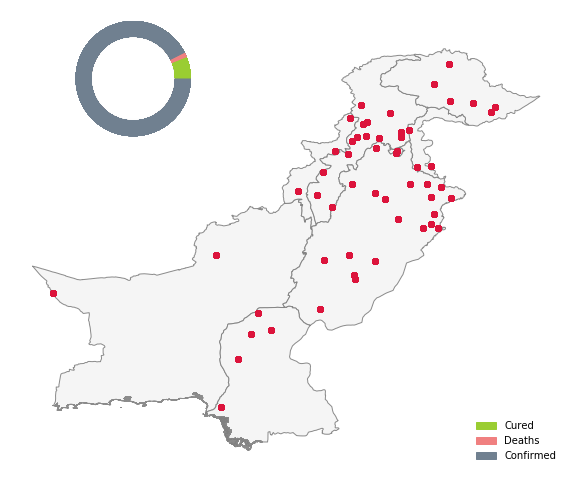

In [14]:
fig, ax = plt.subplots(1, figsize = (10, 12))
ax = pak_map_df.plot(color = 'whitesmoke', edgecolor = 'grey', alpha=0.9, markersize = 1, axes = ax)
for i in range(250):
    ax.scatter(df['lon'][:i], df['lat'][:i], color = 'crimson')
    ax.set_axis_off()

    left, bottom, width, height = [0.2, 0.6, 0.2, 0.2]
    ax2 = fig.add_axes([left, bottom, width, height])

    size = [df['Cured'][:i].sum(),df['Deaths'][:i].sum(),df['Confirmed'][:i].sum()]

    # Create a circle for the center of the plot
    my_circle=plt.Circle((0,0), 0.7, color='white')

    # Give color names
    ax2.pie(size, colors=['yellowgreen','lightcoral','slategray'])
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    ax.legend(handles=[green_patch, red_patch, gray_patch], loc='lower right', frameon=False)
    fig.savefig('images/pakistan/pakistan_spread{}.png'.format(i))

plt.show()